In [65]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import os
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")

sys.path.append('../src')

import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

from sales_project.utils import reduce_size, compare_disributions, get_bins
from sales_project.plotters import linear_plot

pd.set_option('display.max_rows', 100)

sns.set_theme(context='talk', style="darkgrid", palette='dark', font='sans-serif')
tqdm.pandas()

# I. Reading cleaned data

In [2]:
df = pd.read_csv('../data/artifacts/cleaned_data.csv', parse_dates=['date'])

# II. Univariate distribution analysis

In [3]:
train_bins = get_bins(len(df.query("subset == 'train'")))
test_bins = get_bins(len(df.query("subset == 'test'")))
submission_bins = get_bins(len(df.query("subset =='submission'")))
train_bins, test_bins, submission_bins

(243, 94, 52)

## 1. dcoilwtico

In [4]:
x = 'dcoilwtico'

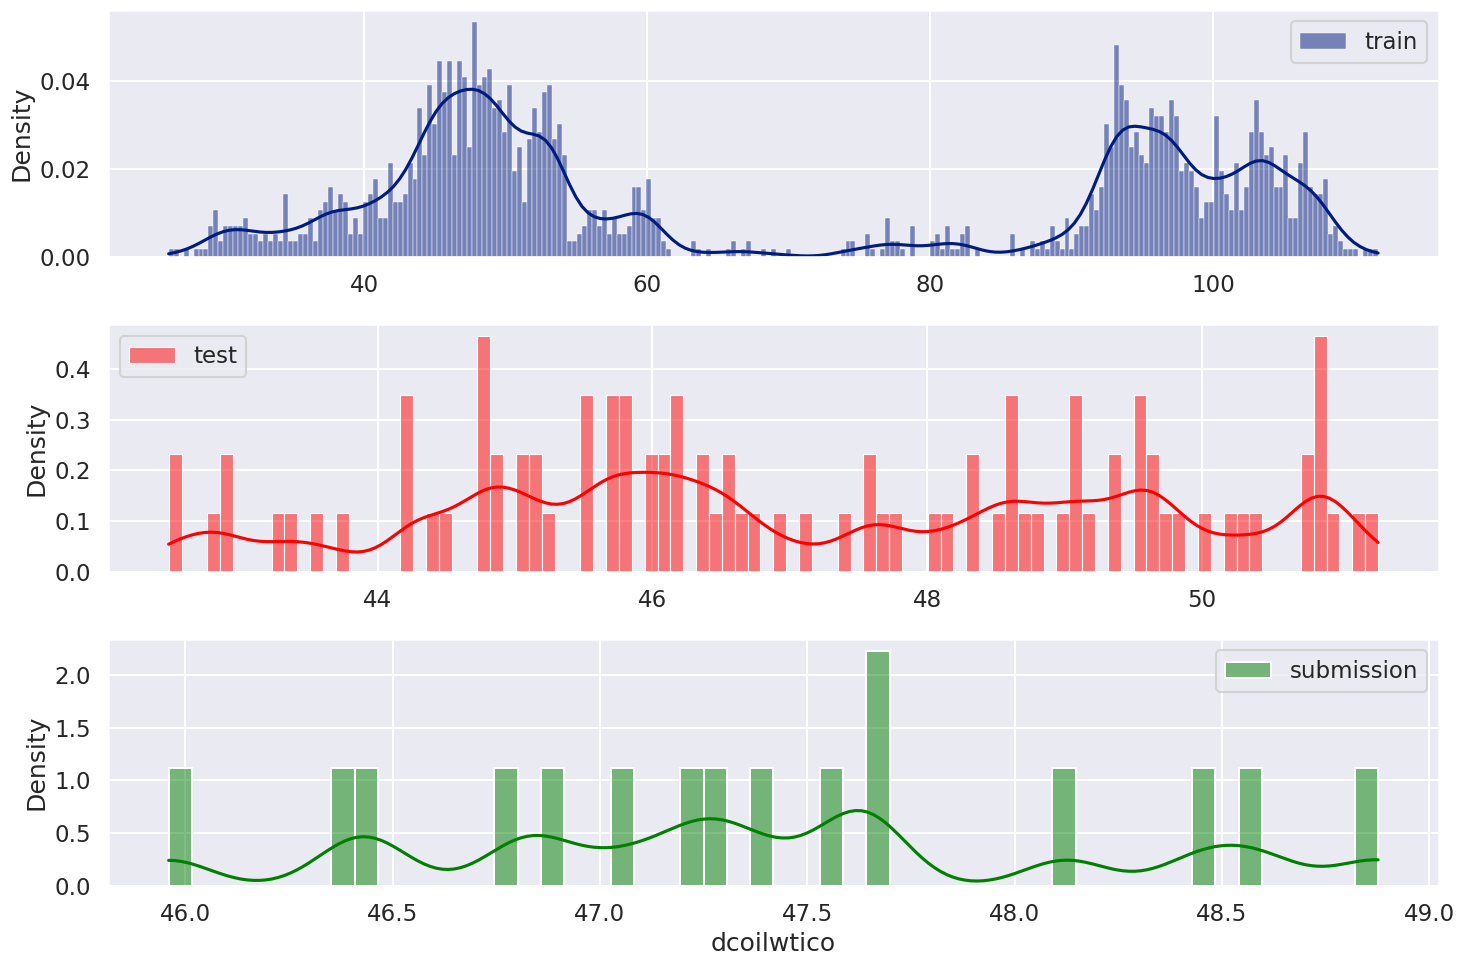

In [11]:
fig, axs = plt.subplots(3, figsize=(15, 10))

# xmin = df[x].min()
# xmax = df[x].max()
# dx = (xmax - xmin) * 0.05


sns.histplot(data=df.query("subset == 'train'"), x=x, kde=True, stat='density', ax=axs[0], label='train', bins=train_bins)
axs[0].legend()
axs[0].set_xlabel("")

sns.histplot(data=df.query("subset == 'test'"), x=x, kde=True, stat='density', ax=axs[1], label='test', bins=test_bins, color='red')
axs[1].legend()
axs[1].set_xlabel("")
#axs[0].set_xlim(xmin - dx, xmax + dx)

sns.histplot(data=df.query("subset == 'submission'"), x=x, kde=True, stat='density', ax=axs[2], bins=submission_bins, label='submission', color='green')
axs[2].legend()
#axs[1].set_xlim(xmin - dx, xmax + dx)

fig.tight_layout()
plt.show()

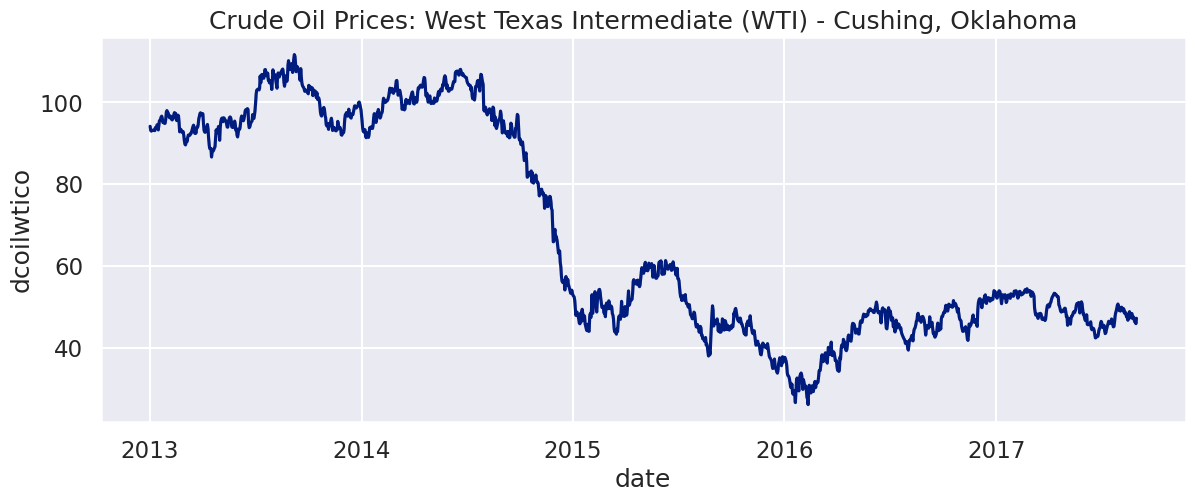

In [8]:
linear_plot(data=df, x='date', y=x, title='Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma')

In [12]:
compare_disributions(data=df, subsets=['train', 'test', 'submission'], feature=x)

  0%|          | 0/3 [00:00<?, ?it/s]

subset1     subset2 ks_2samp.pvalue anderson_ksamp.pvalue  \
0   train        test             0.0                 0.001   
1   train  submission             0.0                 0.001   
2    test  submission             0.0                 0.001   

   significance_level  ks_2samp.are_similar  anderson_ksamp.are_similar  
0                0.05                 False                       False  
1                0.05                 False                       False  
2                0.05                 False                       False

It seems that this feature is sampled from two distributions with at least a different median value.  
If to analyse the time series plot above, it is clear that it is so due to a major decline in the  
price after 2015.

Since the data in the submission and test subsets is dated after 2015, the values are drown only from one of the distributions.  
Therefore, the distribution of the submission and test subsets is very different according to the graphs and the statistical tests.


It is possible to create a new feature by rescaling.  

In [5]:
df2 = df[[x, 'subset']].query(f"({x} < 70) and (subset == 'train')")
mean1, std1 = df2[x].mean(), df2[x].std()

df2 = df[[x, 'subset']].query(f"({x} >= 70) and (subset == 'train')")
mean2, std2 = df2[x].mean(), df2[x].std()

mean1, mean2, std1, std2

(47.235871619320264, 97.42576628258303, 7.399005840744426, 7.110623345812015)

In [6]:
df.loc[df[x] < 70, f"scaled_{x}"] = (df.loc[df[x] < 70, x] - mean1)/std1
df.loc[df[x] >= 70, f"scaled_{x}"] = (df.loc[df[x] >= 70, x] - mean2)/std2

x = f"scaled_{x}"

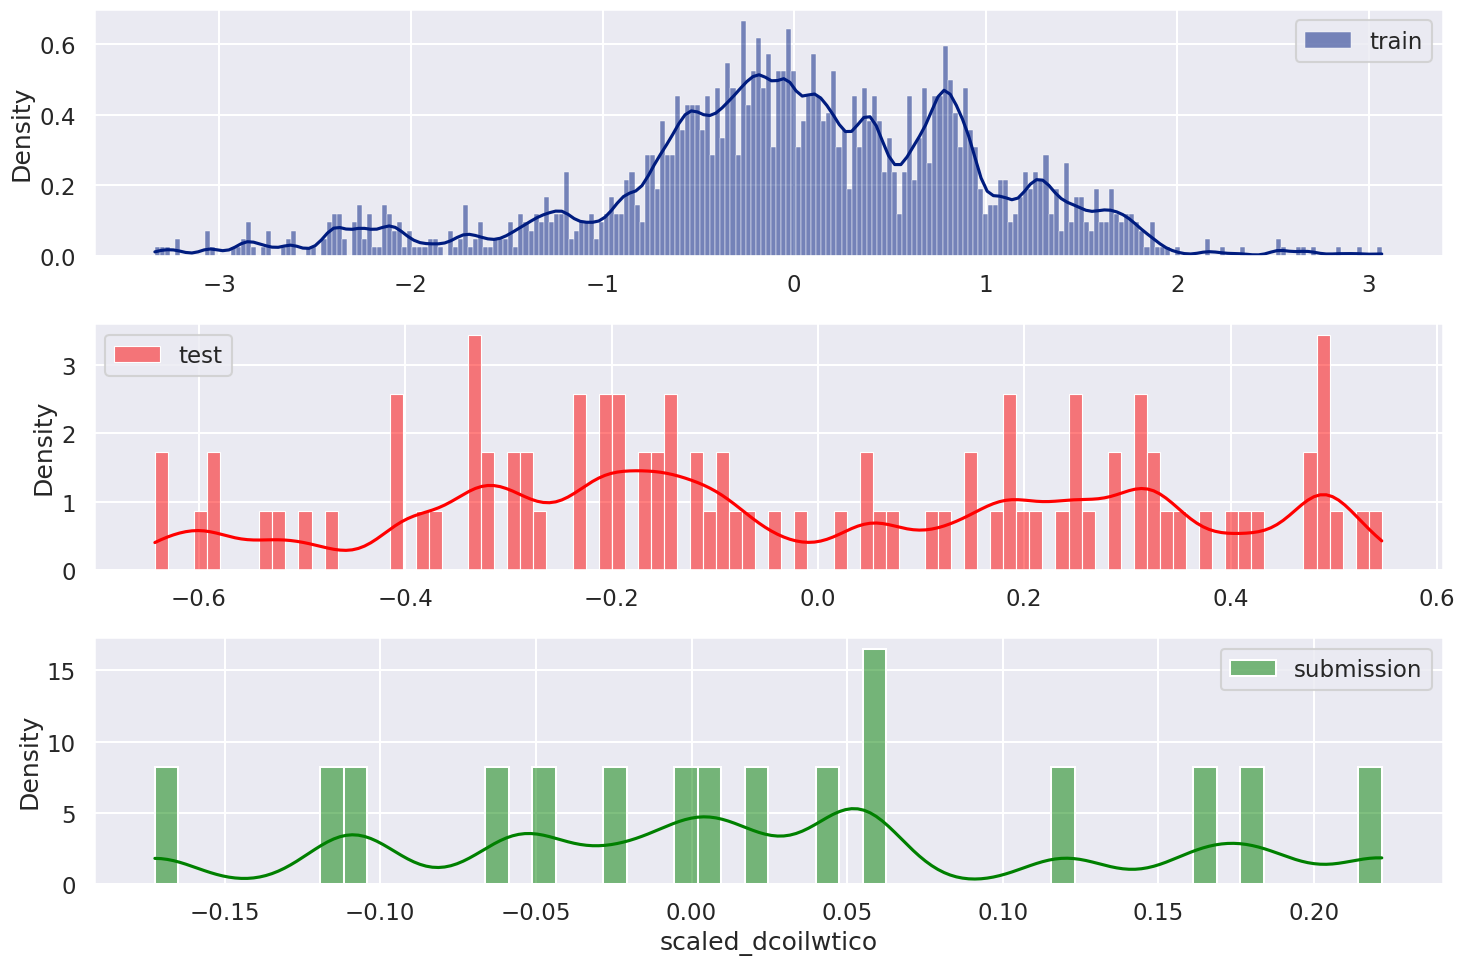

In [21]:
fig, axs = plt.subplots(3, figsize=(15, 10))


sns.histplot(data=df.query("subset == 'train'"), x=x, kde=True, stat='density', ax=axs[0], label='train', bins=train_bins)
axs[0].legend()
axs[0].set_xlabel("")

sns.histplot(data=df.query("subset == 'test'"), x=x, kde=True, stat='density', ax=axs[1], label='test', bins=test_bins, color='red')
axs[1].legend()
axs[1].set_xlabel("")

sns.histplot(data=df.query("subset == 'submission'"), x=x, kde=True, stat='density', ax=axs[2], bins=submission_bins, label='submission', color='green')
axs[2].legend()

fig.tight_layout()
plt.show()

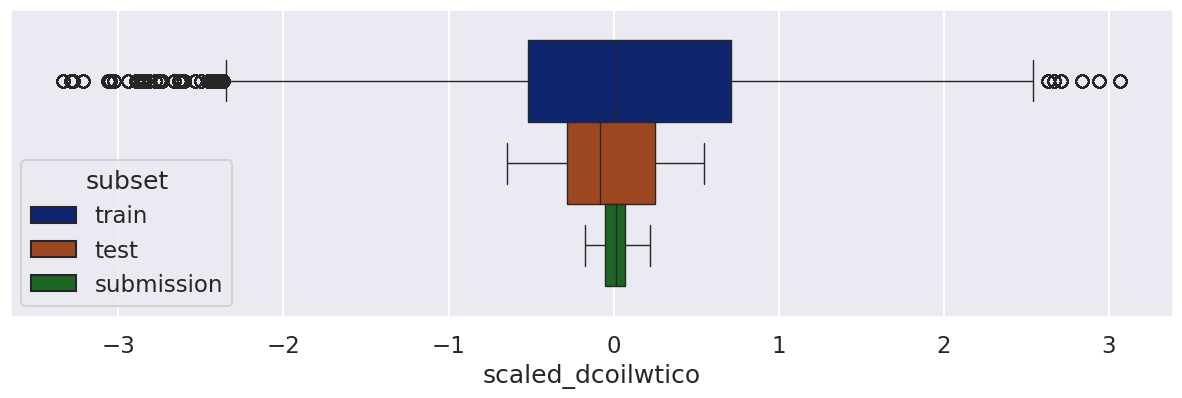

In [22]:
fig, axs = plt.subplots(1, figsize=(15, 4))
sns.boxplot(data=df, x=x, orient="h", ax=axs, hue='subset')
plt.show()

In [23]:
compare_disributions(data=df, subsets=['train', 'test', 'submission'], feature=x)

  0%|          | 0/3 [00:00<?, ?it/s]

subset1     subset2 ks_2samp.pvalue anderson_ksamp.pvalue  \
0   train        test             0.0                 0.001   
1   train  submission             0.0                 0.001   
2    test  submission             0.0                 0.001   

   significance_level  ks_2samp.are_similar  anderson_ksamp.are_similar  
0                0.05                 False                       False  
1                0.05                 False                       False  
2                0.05                 False                       False

## 2. transactions

In [8]:
x = 'transactions'

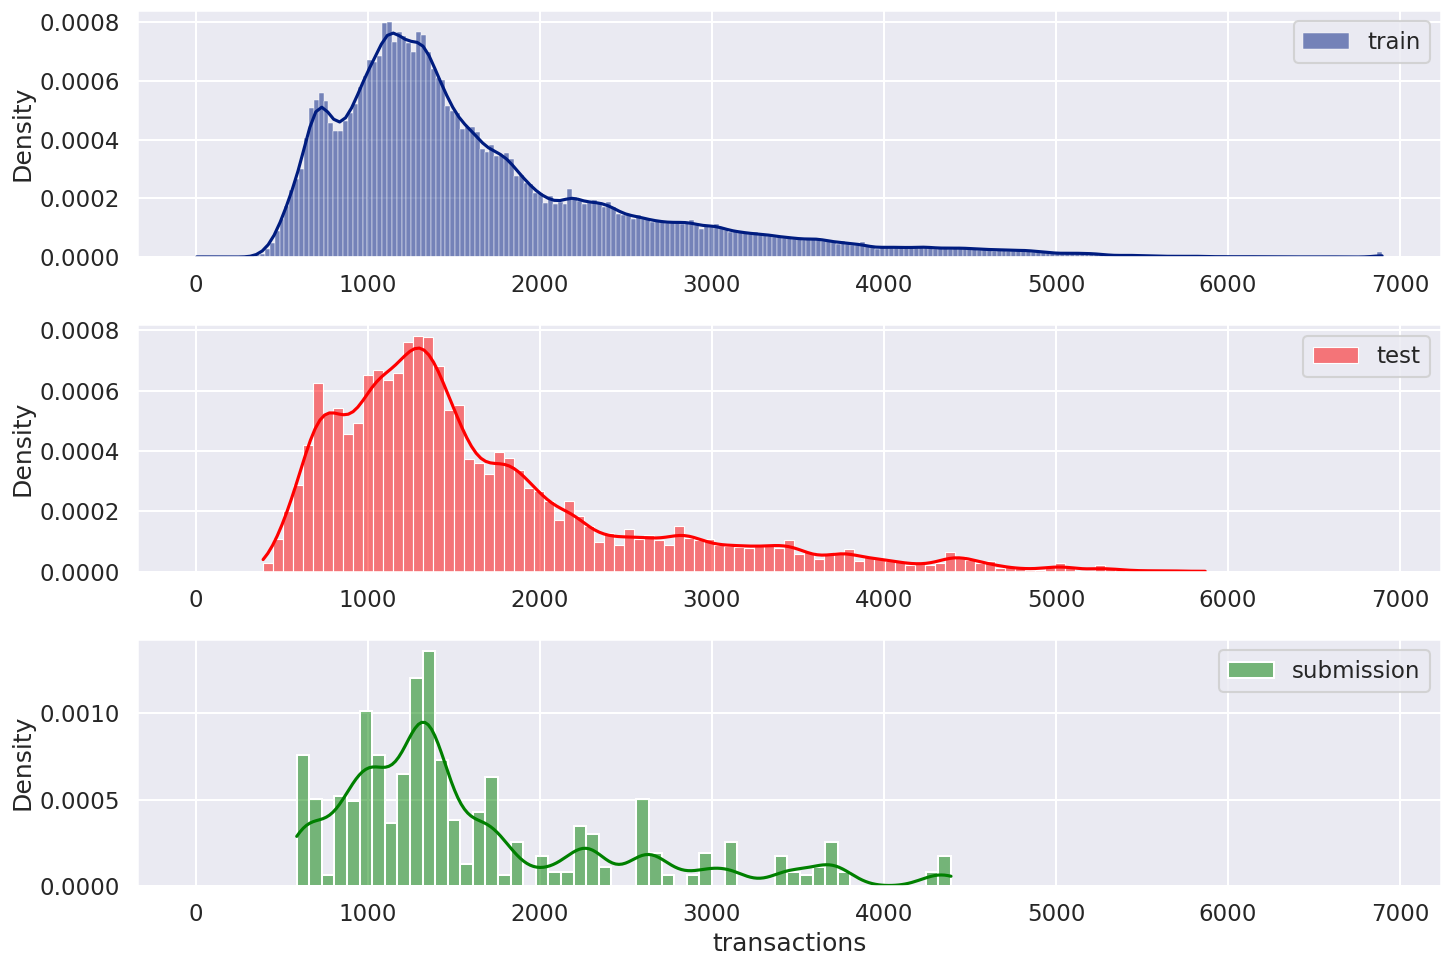

In [25]:
fig, axs = plt.subplots(3, figsize=(15, 10))

xmin = df[x].min()
xmax = df[x].max()
dx = (xmax - xmin) * 0.05

sns.histplot(data=df.query("subset == 'train'"), x=x, kde=True, stat='density', ax=axs[0], label='train', bins=train_bins)
axs[0].legend()
axs[0].set_xlabel("")
axs[0].set_xlim(xmin - dx, xmax + dx)

sns.histplot(data=df.query("subset == 'test'"), x=x, kde=True, stat='density', ax=axs[1], label='test', bins=test_bins, color='red')
axs[1].legend()
axs[1].set_xlabel("")
axs[1].set_xlim(xmin - dx, xmax + dx)

sns.histplot(data=df.query("subset == 'submission'"), x=x, kde=True, stat='density', ax=axs[2], bins=submission_bins, label='submission', color='green')
axs[2].legend()
axs[2].set_xlim(xmin - dx, xmax + dx)

fig.tight_layout()
plt.show()

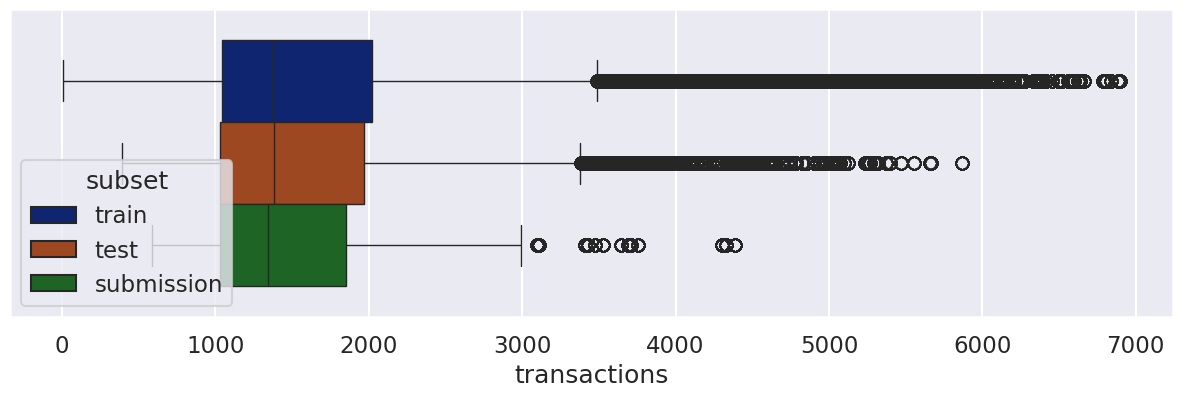

In [26]:
fig, axs = plt.subplots(1, figsize=(15, 4))
sns.boxplot(data=df, x=x, orient="h", ax=axs, hue='subset')
plt.show()

In [27]:
compare_disributions(data=df, subsets=['train', 'test', 'submission'], feature=x)

  0%|          | 0/3 [00:00<?, ?it/s]

subset1     subset2 ks_2samp.pvalue anderson_ksamp.pvalue  \
0   train        test             0.0                 0.001   
1   train  submission             0.0                 0.001   
2    test  submission             0.0                 0.001   

   significance_level  ks_2samp.are_similar  anderson_ksamp.are_similar  
0                0.05                 False                       False  
1                0.05                 False                       False  
2                0.05                 False                       False

## 3. onpromotion

In [9]:
x = 'onpromotion'

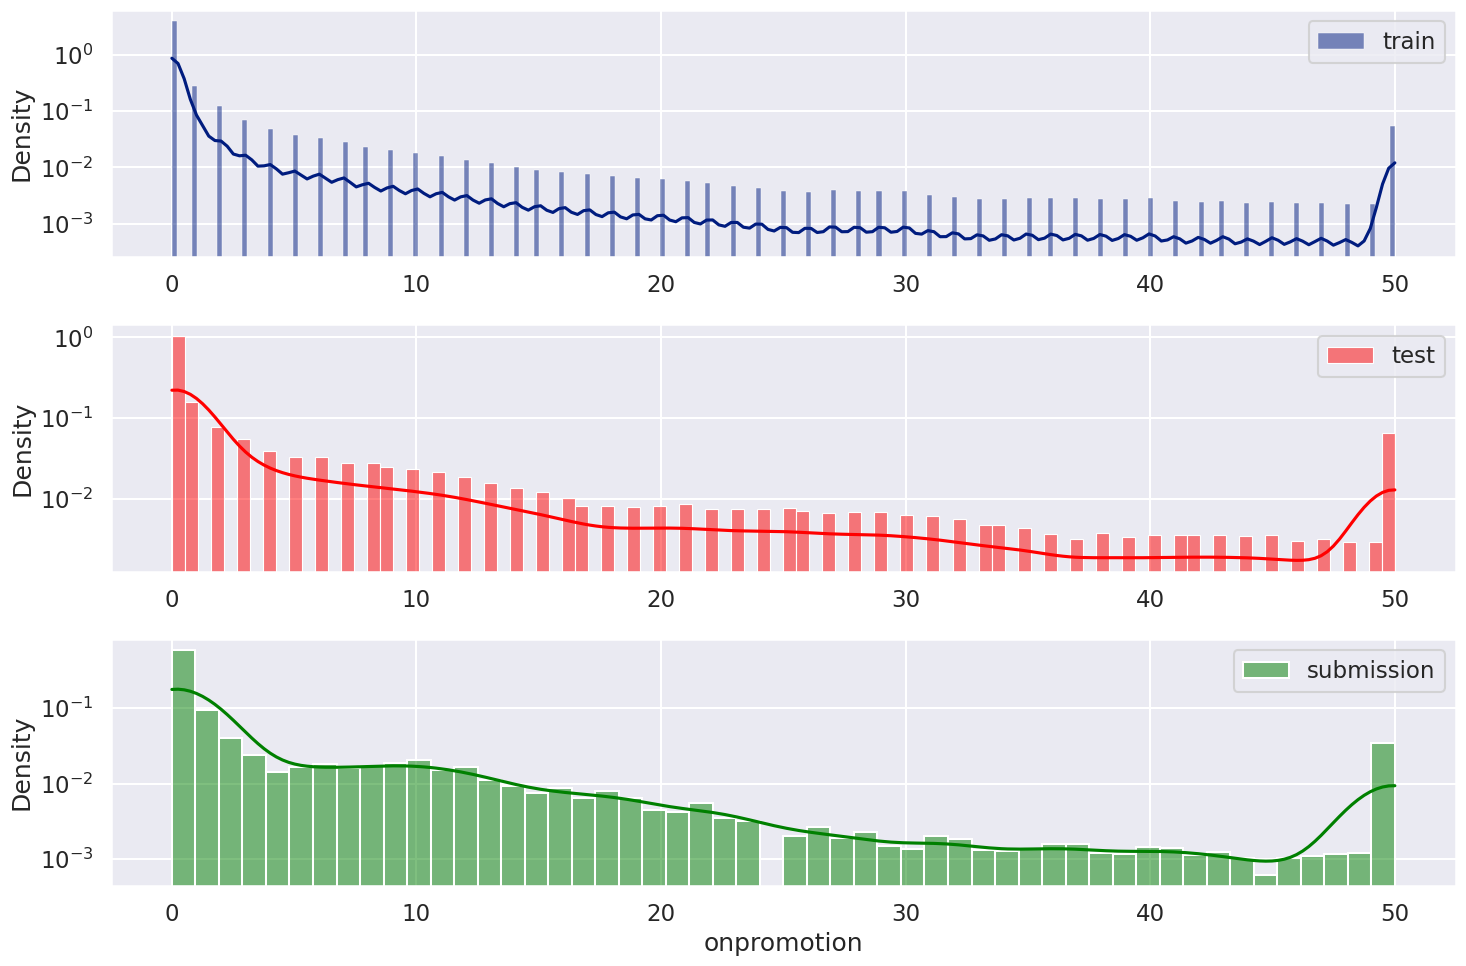

In [38]:
fig, axs = plt.subplots(3, figsize=(15, 10))

xmin = df[x].min()
xmax = df[x].max()
dx = (xmax - xmin) * 0.05

sns.histplot(data=df.query("subset == 'train'"), x=x, kde=True, stat='density', ax=axs[0], label='train', bins=train_bins)
axs[0].legend()
axs[0].set_xlabel("")
axs[0].set_xlim(xmin - dx, xmax + dx)

sns.histplot(data=df.query("subset == 'test'"), x=x, kde=True, stat='density', ax=axs[1], label='test', bins=test_bins, color='red')
axs[1].legend()
axs[1].set_xlabel("")
axs[1].set_xlim(xmin - dx, xmax + dx)

sns.histplot(data=df.query("subset == 'submission'"), x=x, kde=True, stat='density', ax=axs[2], bins=submission_bins, label='submission', color='green')
axs[2].legend()
axs[2].set_xlim(xmin - dx, xmax + dx)

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[2].set_yscale('log')

fig.tight_layout()
plt.show()

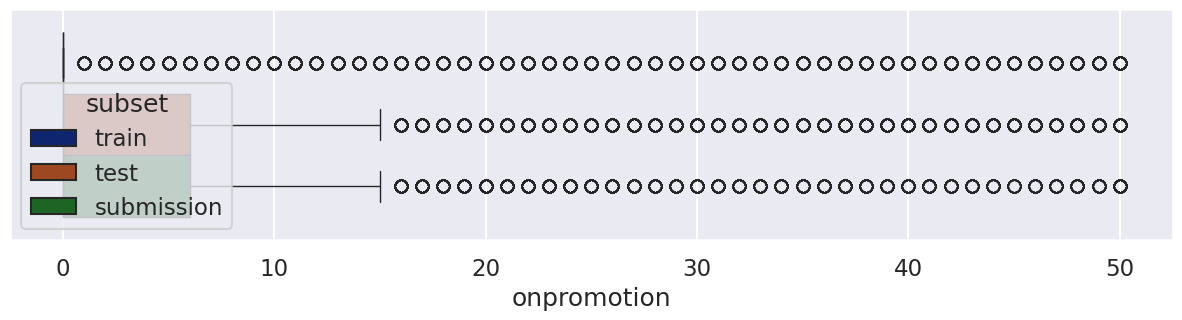

In [39]:
fig, axs = plt.subplots(1, figsize=(15, 3))
sns.boxplot(data=df, x=x, orient="h", ax=axs, hue='subset')
plt.show()

In [40]:
compare_disributions(data=df, subsets=['train', 'test', 'submission'], feature=x)

  0%|          | 0/3 [00:00<?, ?it/s]

subset1     subset2 ks_2samp.pvalue anderson_ksamp.pvalue  \
0   train        test             0.0                 0.001   
1   train  submission             0.0                 0.001   
2    test  submission             0.0                 0.001   

   significance_level  ks_2samp.are_similar  anderson_ksamp.are_similar  
0                0.05                 False                       False  
1                0.05                 False                       False  
2                0.05                 False                       False

In [41]:
print('train', df.query("subset == 'train'")[x].describe())
print('test', df.query("subset == 'test'")[x].describe())
print('submission', df.query("subset == 'submission'")[x].describe())

train count    2.844072e+06
mean     1.905921e+00
std      7.291811e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.000000e+01
Name: onpromotion, dtype: float64
test count    163944.000000
mean          6.167319
std          12.416182
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max          50.000000
Name: onpromotion, dtype: float64
submission count    28512.000000
mean         5.614513
std         11.439287
min          0.000000
25%          0.000000
50%          0.000000
75%          6.000000
max         50.000000
Name: onpromotion, dtype: float64


In [42]:
(df[x] == 0.0).value_counts()/len(df)

onpromotion
True     0.793949
False    0.206051
Name: count, dtype: float64

It is clear there are a lot of 0 values for the `onpromotion` - days at which there was no promotion for  
a given product and store

The distributions for the train and test subsets are similar, but the one for the submission subset is not.  

In [7]:
df['is_promoted'] = df['onpromotion'] > 0

# IV. Pairplots with target

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036528 entries, 0 to 3036527
Data columns (total 17 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   id                        int64         
 1   date                      datetime64[ns]
 2   store_nbr                 int64         
 3   family                    object        
 4   onpromotion               float64       
 5   is_submission             bool          
 6   city                      object        
 7   state                     object        
 8   type                      object        
 9   cluster                   int64         
 10  dcoilwtico                float64       
 11  transactions              float64       
 12  median_sales_over_family  float64       
 13  relative_sales            float64       
 14  subset                    object        
 15  scaled_dcoilwtico         float64       
 16  is_promoted               bool          
dtypes: bool(

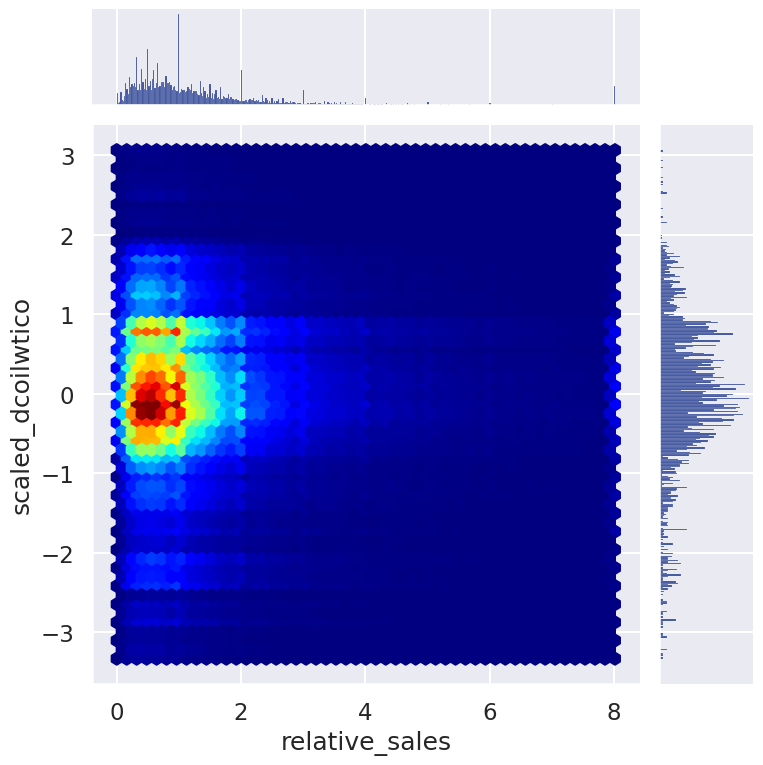

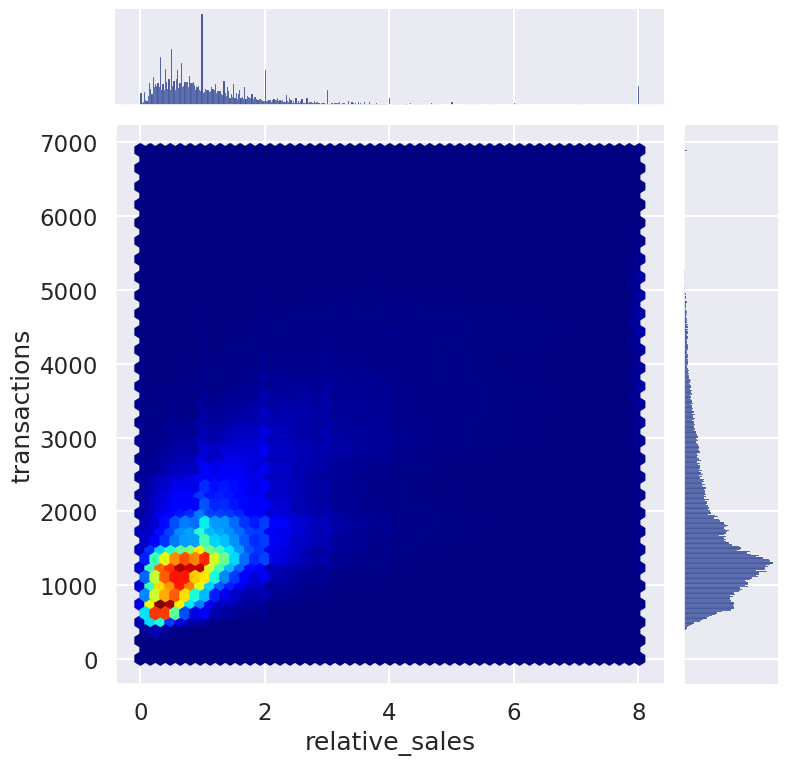

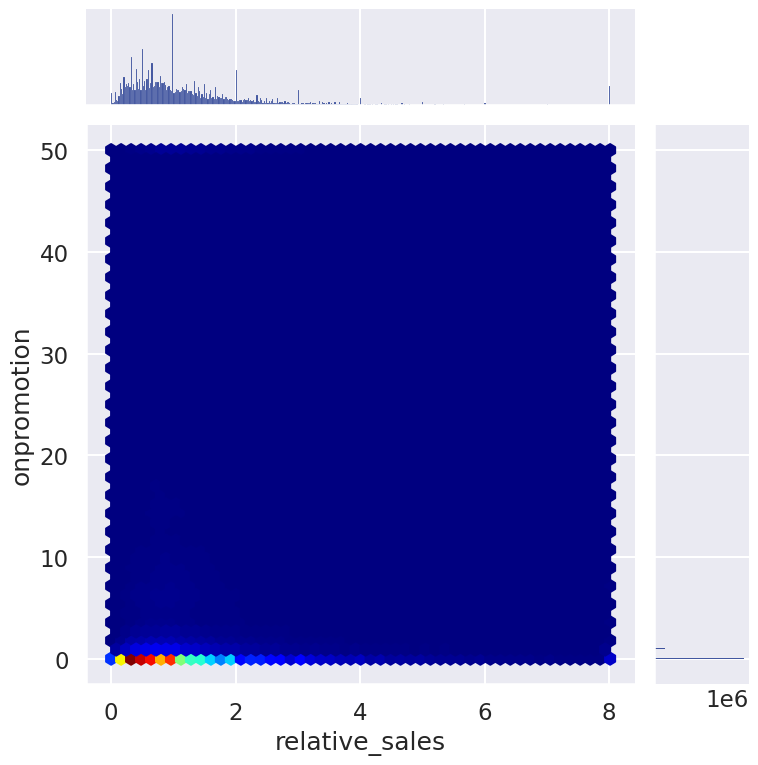

In [127]:
for col in ['scaled_dcoilwtico', 'transactions', 'onpromotion']:
    df2 = df[['relative_sales', col]].query('relative_sales > 0')#.query(f'{col} > 0')
    sns.jointplot(x=df2['relative_sales'], y=df2[col], cmap="jet", kind='hex', height=8)

## 1. Relative sales vs Family

In [ ]:
# sns.displot(data=df.query('not is_submission'), x='relative_sales', row='family', col='subset', height=3, aspect=3)
# #plt.xscale('log')
# plt.yscale('log')

It can be seen, that the distribution for the train and test subset is similar for each `family` (group of products).  
The distributions have a clear peak at `relative_sales` = 0, which indicates the number of days at which no products of the corresponding `family` were  sold.  
It is possible to distinguish two separate groups of distributions based on the `family`:  
- the less `relative_sales` value - the more number of days at which the `family` was sold with the corresponding `relative_sales` value  
- there is a peak at some `relative_sales` value (not 0). There are less dates at which the products were sold with a less or higher `relative_sales` value.  

Considering, that the plots above are shown in log scale along y axis, it is valid to say that it is more likely to sell low amount  
of some product at some random day. Higher sales dates are probably related to holidays, weekends or some other exceptional days.  

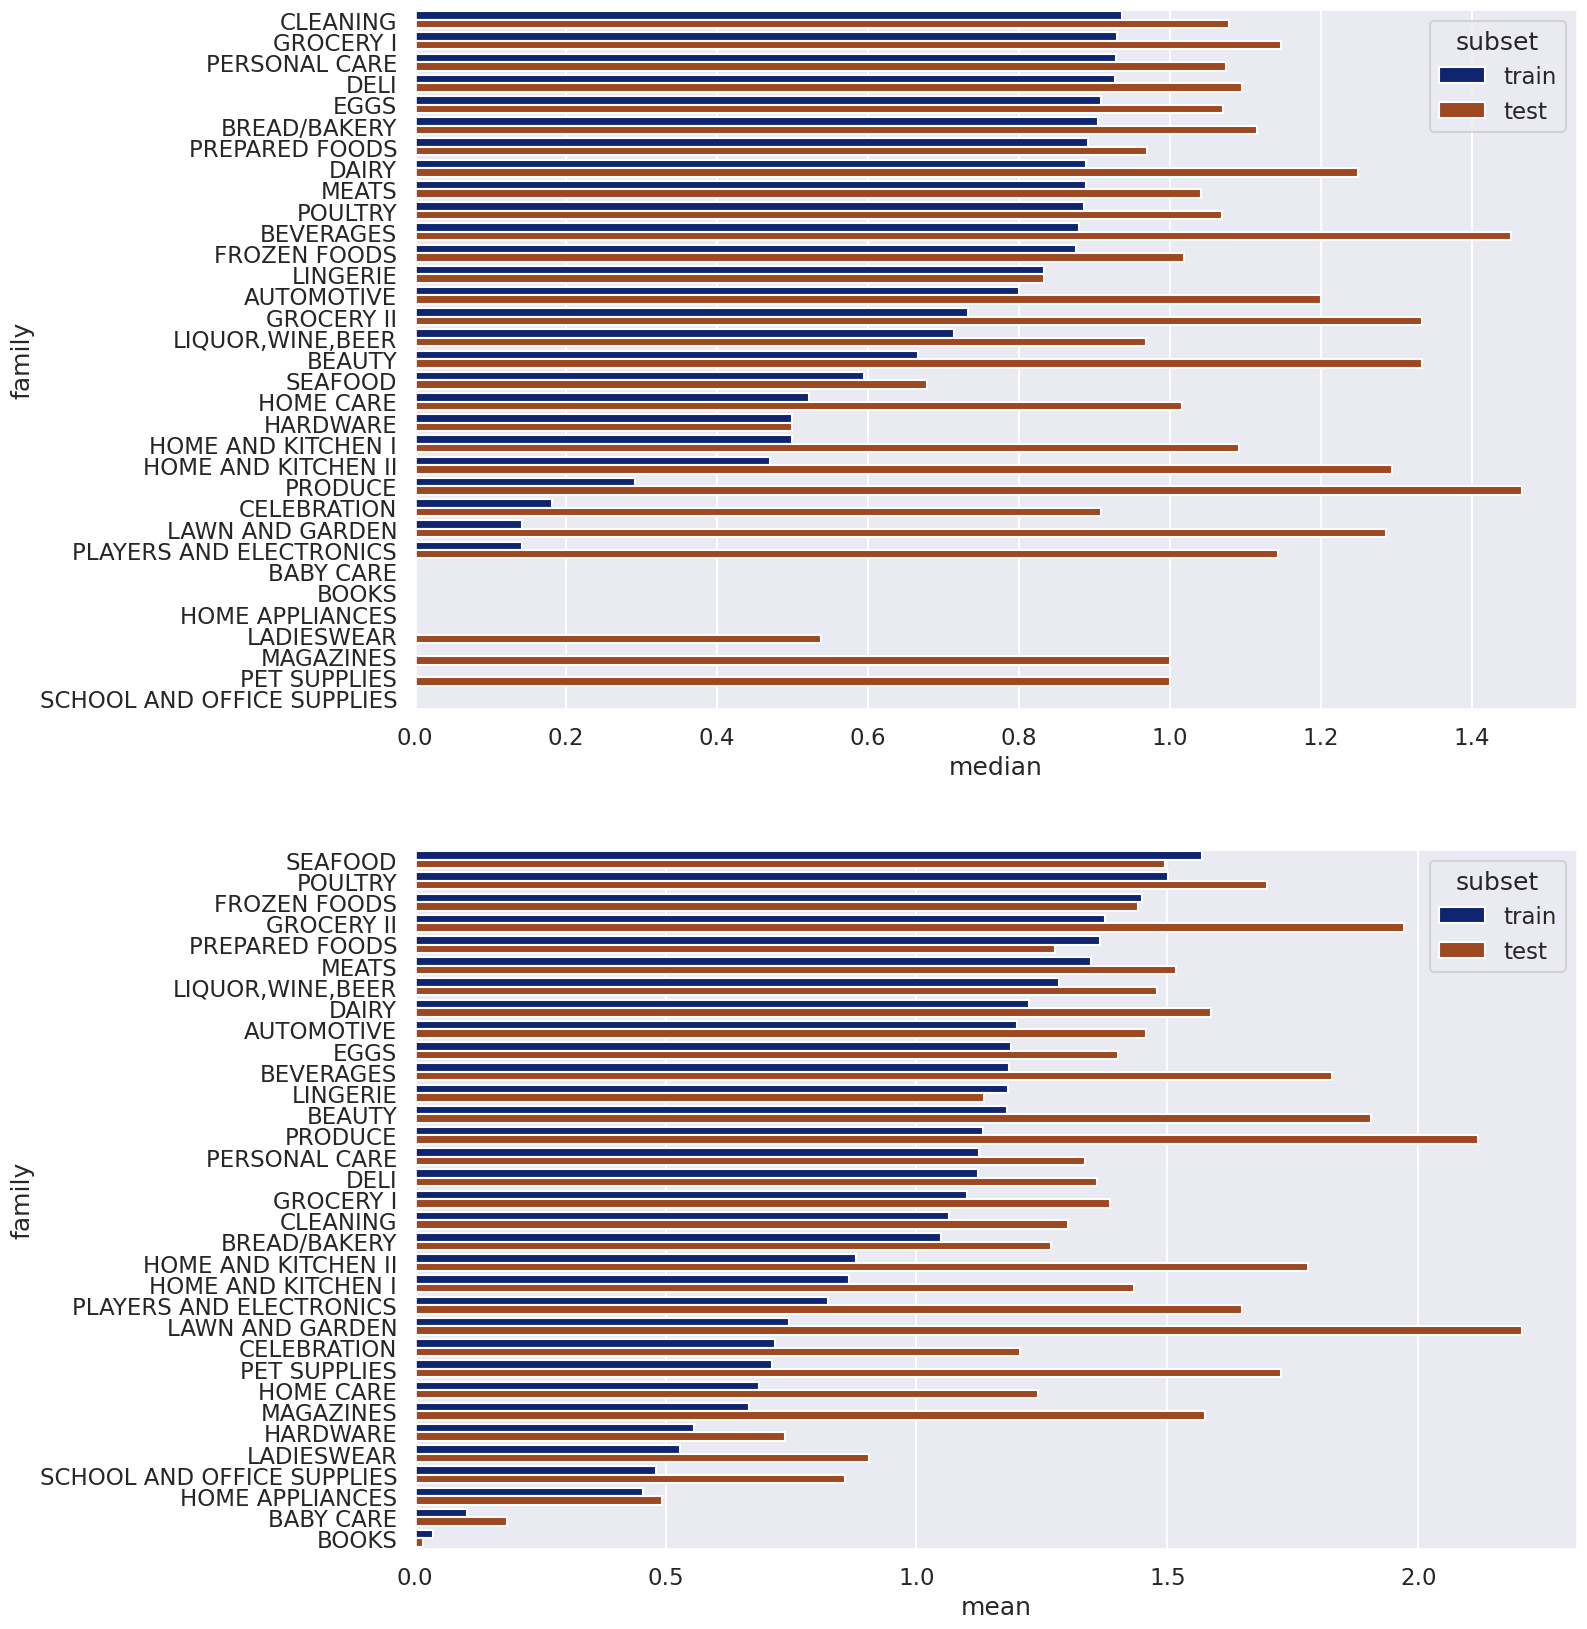

In [93]:
x = 'family'

fig, axs = plt.subplots(2, figsize=(15, 20))

df2 = df.query('not is_submission').groupby([x, 'subset'])['relative_sales'].agg(['median']).reset_index().sort_values(by=['subset', 'median'], ascending=False)
sns.barplot(data=df2, y=x, x='median', orient='h', ax=axs[0], hue='subset', hue_order=['train', 'test'])

df2 = df.query('not is_submission').groupby([x, 'subset'])['relative_sales'].agg(['mean']).reset_index().sort_values(by=['subset', 'mean'], ascending=False)
sns.barplot(data=df2, y=x, x='mean', orient='h', ax=axs[1], hue='subset', hue_order=['train', 'test'])

plt.show()

If to calculate the mean and median values of `relative_sales` over each `family`, we can see that:  
1. The distribution is almost the same for both train and test
2. High `relative_sales` can be observed for everyday products, like bakery or beverages
3. Low `relative_sales` can be observed for products that are bought occasionally, like clothing, electronics or   groceries, or for products that have might cost too big prices or sold in a big quantity, like groceries, wines, some supplies

## 2. Relative sales vs Store

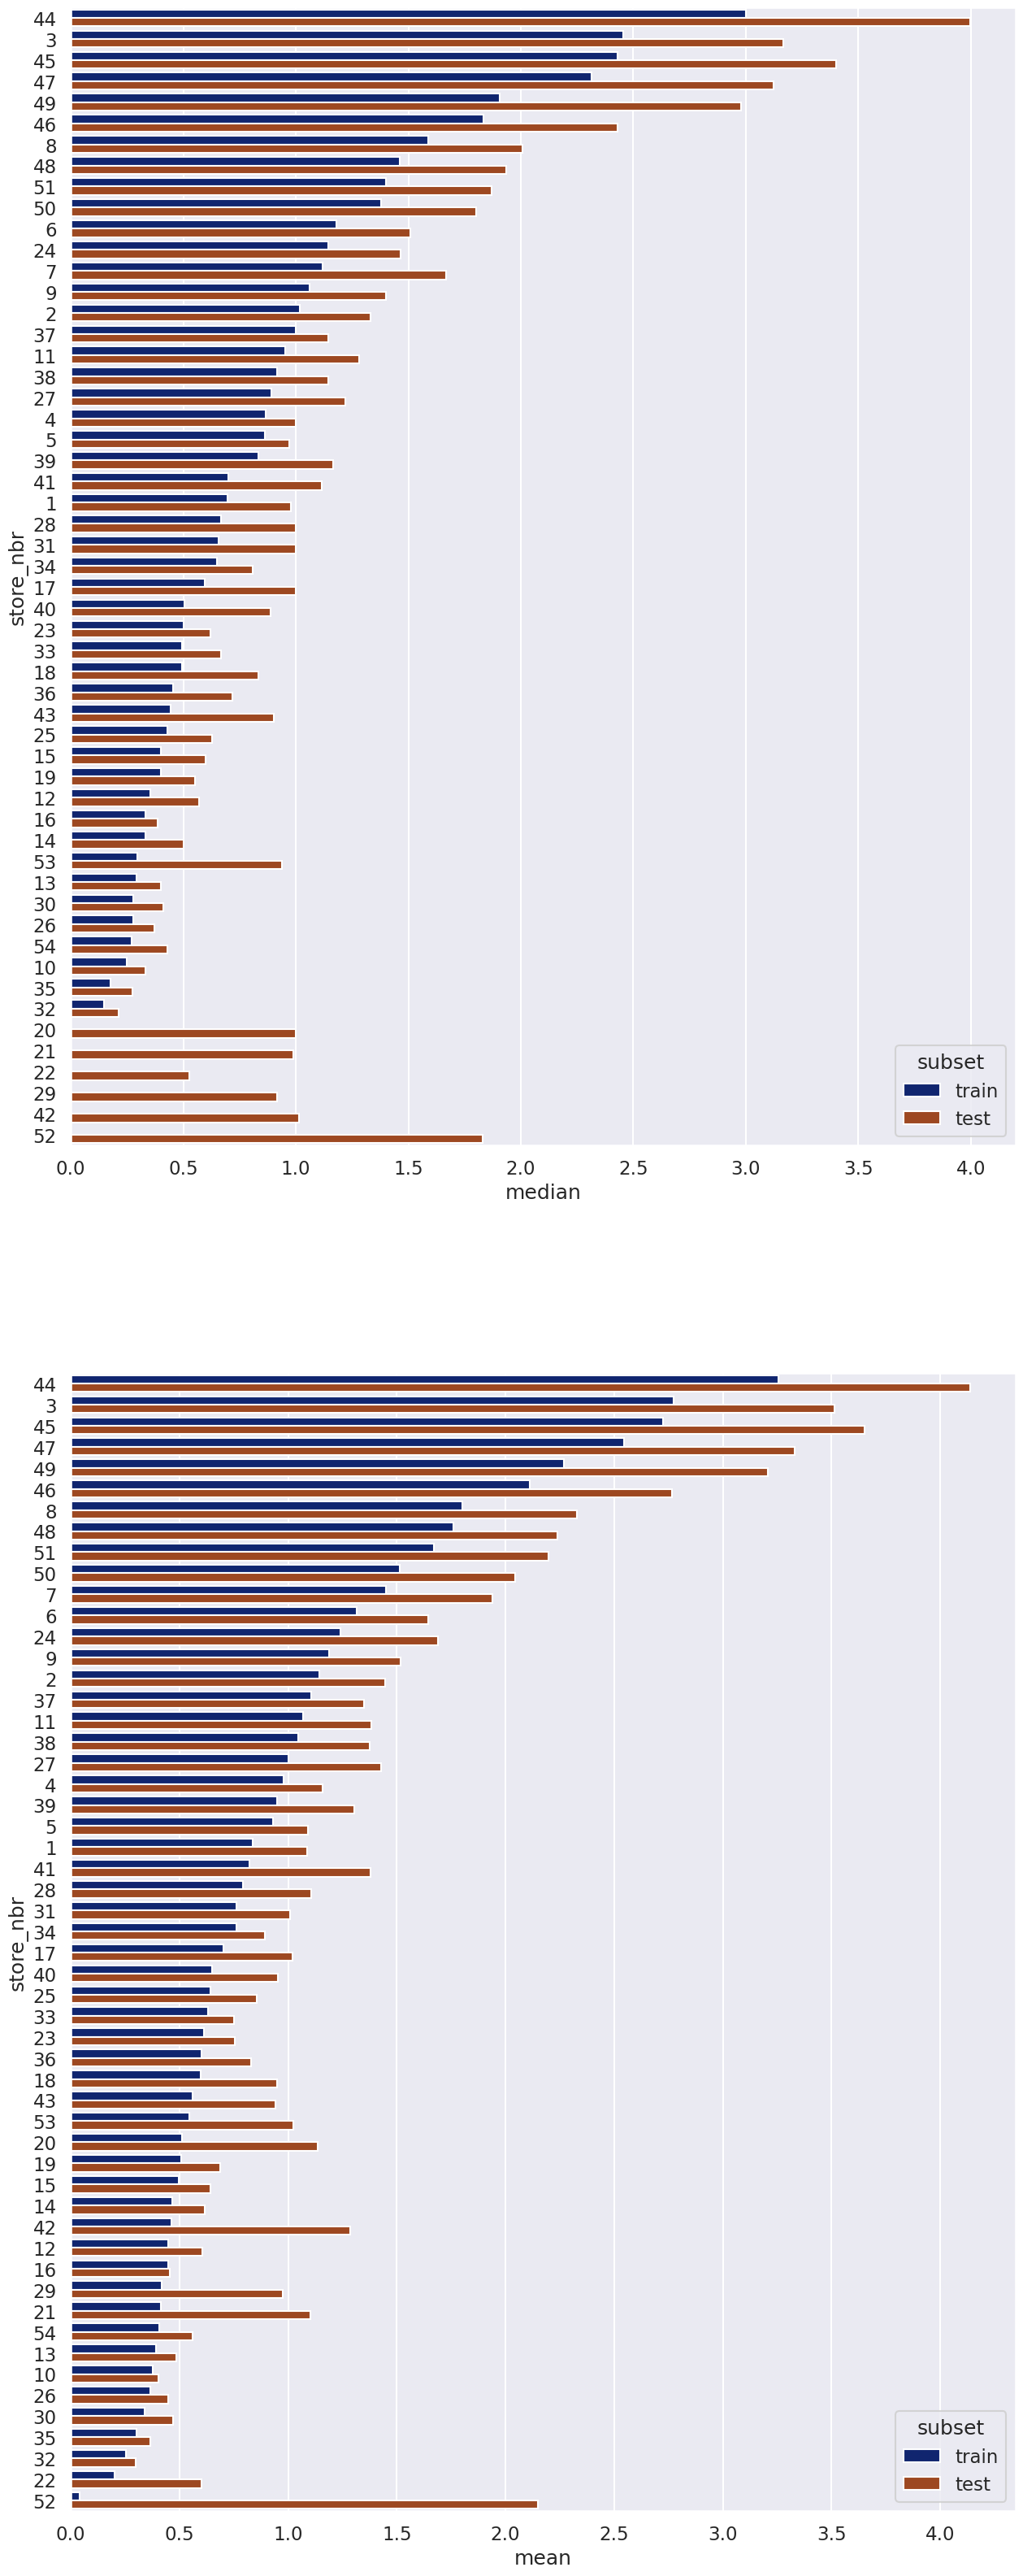

In [56]:
x = 'store_nbr'

fig, axs = plt.subplots(2, figsize=(15, 40))

df2 = df.query('not is_submission').groupby([x, 'subset'])['relative_sales'].agg(['median']).reset_index().sort_values(by=['subset', 'median'], ascending=False)
df2[x] = df2[x].astype(str)
sns.barplot(data=df2, y=x, x='median', orient='h', ax=axs[0], hue='subset', hue_order=['train', 'test'])

df2 = df.query('not is_submission').groupby([x, 'subset'])['relative_sales'].agg(['mean']).reset_index().sort_values(by=['subset', 'mean'], ascending=False)
df2[x] = df2[x].astype(str)
sns.barplot(data=df2, y=x, x='mean', orient='h', ax=axs[1], hue='subset', hue_order=['train', 'test'])

plt.show()

If to calculate the mean and median values of `relative_sales` over each `store_nbr`, we can see that:  
1. The distribution is almost the same for both train and test
2. High `relative_sales` can be observed for stores, which are probably big (it is rare to observe too big sales since there are already too much products being sold each day) or sell every-day products (these products don't have a wide spread of cost)
3. Low `relative_sales` can be observed for stores, which probably sell occasionally bought products with a wide spread of cost or stores with a wide choice of products to sell

There is no point in clustering stores since there is a feature `cluster` which groups similar stores

## 3. Relative sales vs cluster    

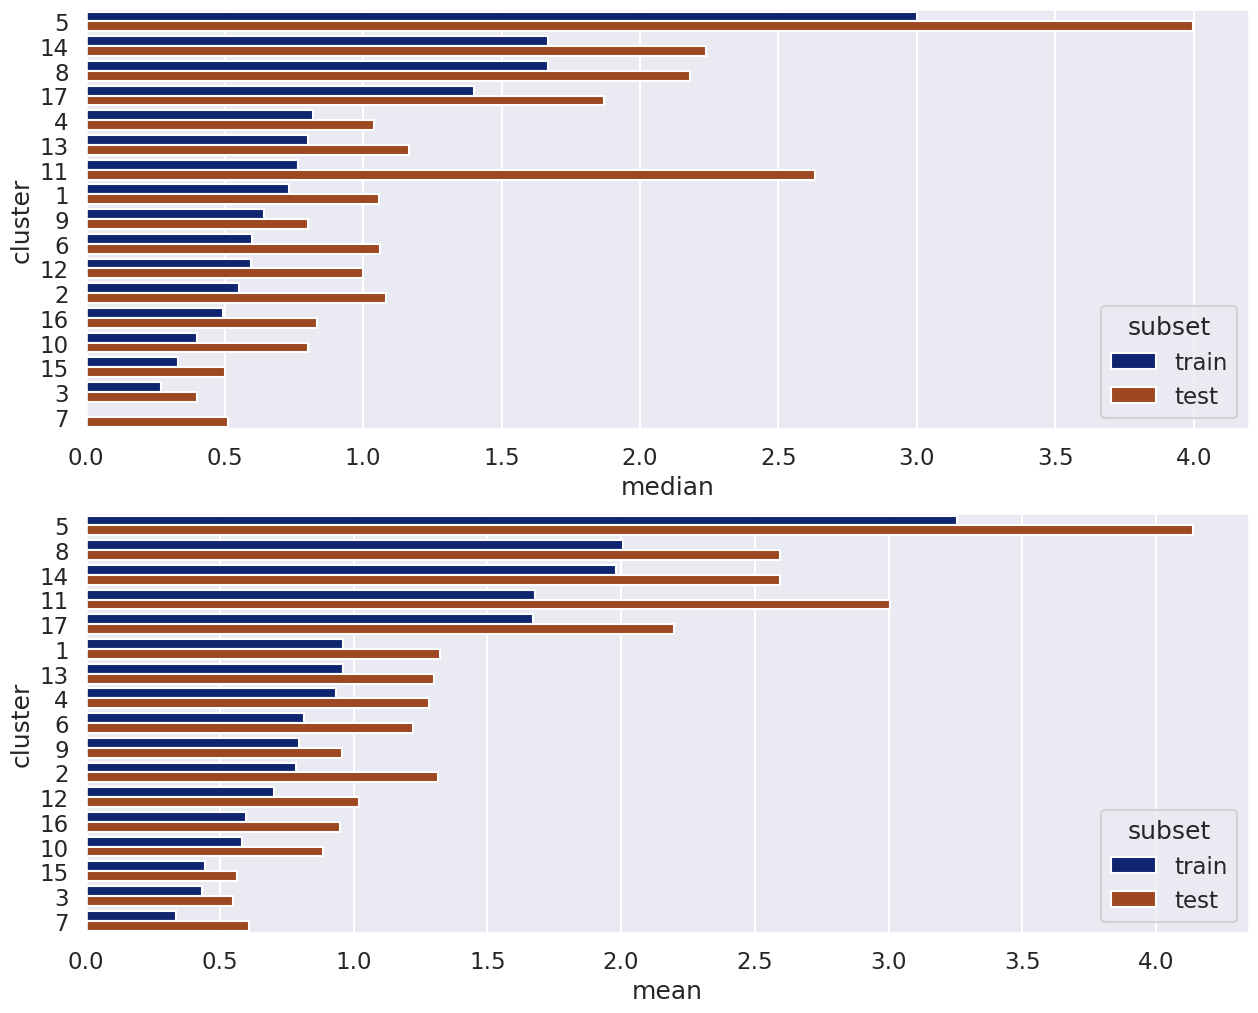

In [60]:
x = 'cluster'

fig, axs = plt.subplots(2, figsize=(15, 12))

df2 = df.query('not is_submission').groupby([x, 'subset'])['relative_sales'].agg(['median']).reset_index().sort_values(by=['subset', 'median'], ascending=False)
df2[x] = df2[x].astype(str)
sns.barplot(data=df2, y=x, x='median', orient='h', ax=axs[0], hue='subset', hue_order=['train', 'test'])

df2 = df.query('not is_submission').groupby([x, 'subset'])['relative_sales'].agg(['mean']).reset_index().sort_values(by=['subset', 'mean'], ascending=False)
df2[x] = df2[x].astype(str)
sns.barplot(data=df2, y=x, x='mean', orient='h', ax=axs[1], hue='subset', hue_order=['train', 'test'])

plt.show()

The same observation can be made as for `store_nbr`

## 4. Relative sales vs city and state

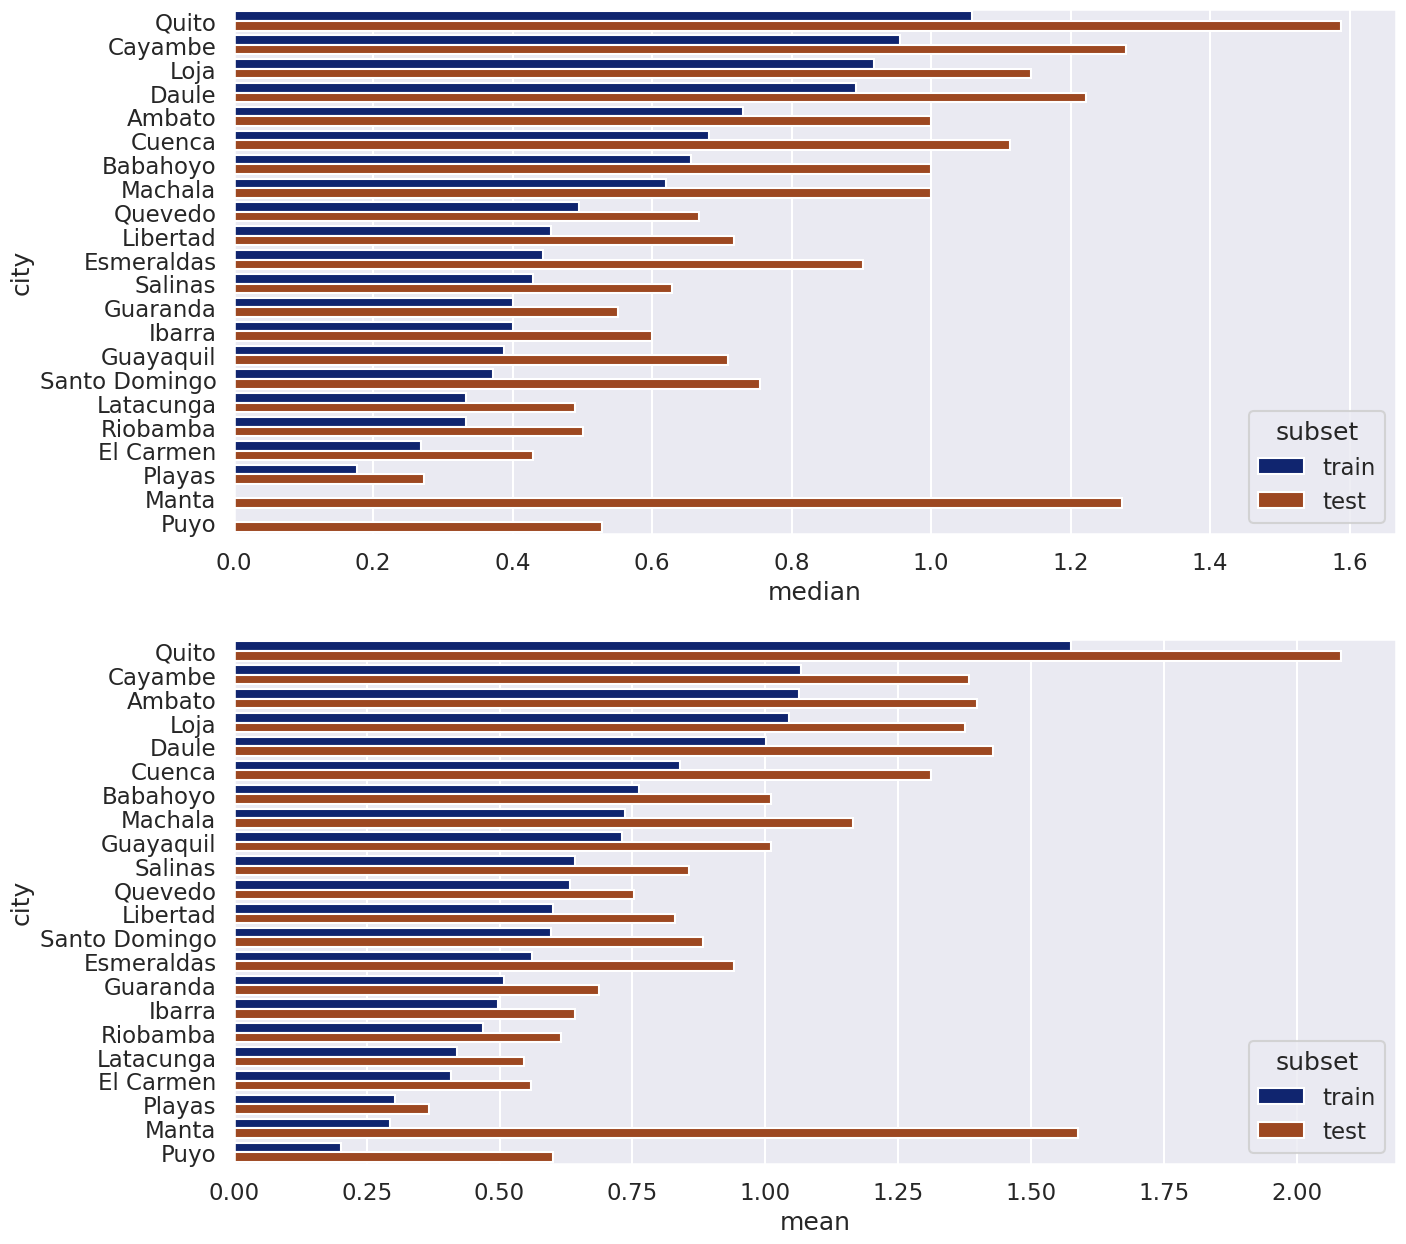

In [61]:
x = 'city'

fig, axs = plt.subplots(2, figsize=(15, 15))

df2 = df.query('not is_submission').groupby([x, 'subset'])['relative_sales'].agg(['median']).reset_index().sort_values(by=['subset', 'median'], ascending=False)
df2[x] = df2[x].astype(str)
sns.barplot(data=df2, y=x, x='median', orient='h', ax=axs[0], hue='subset', hue_order=['train', 'test'])

df2 = df.query('not is_submission').groupby([x, 'subset'])['relative_sales'].agg(['mean']).reset_index().sort_values(by=['subset', 'mean'], ascending=False)
df2[x] = df2[x].astype(str)
sns.barplot(data=df2, y=x, x='mean', orient='h', ax=axs[1], hue='subset', hue_order=['train', 'test'])

plt.show()

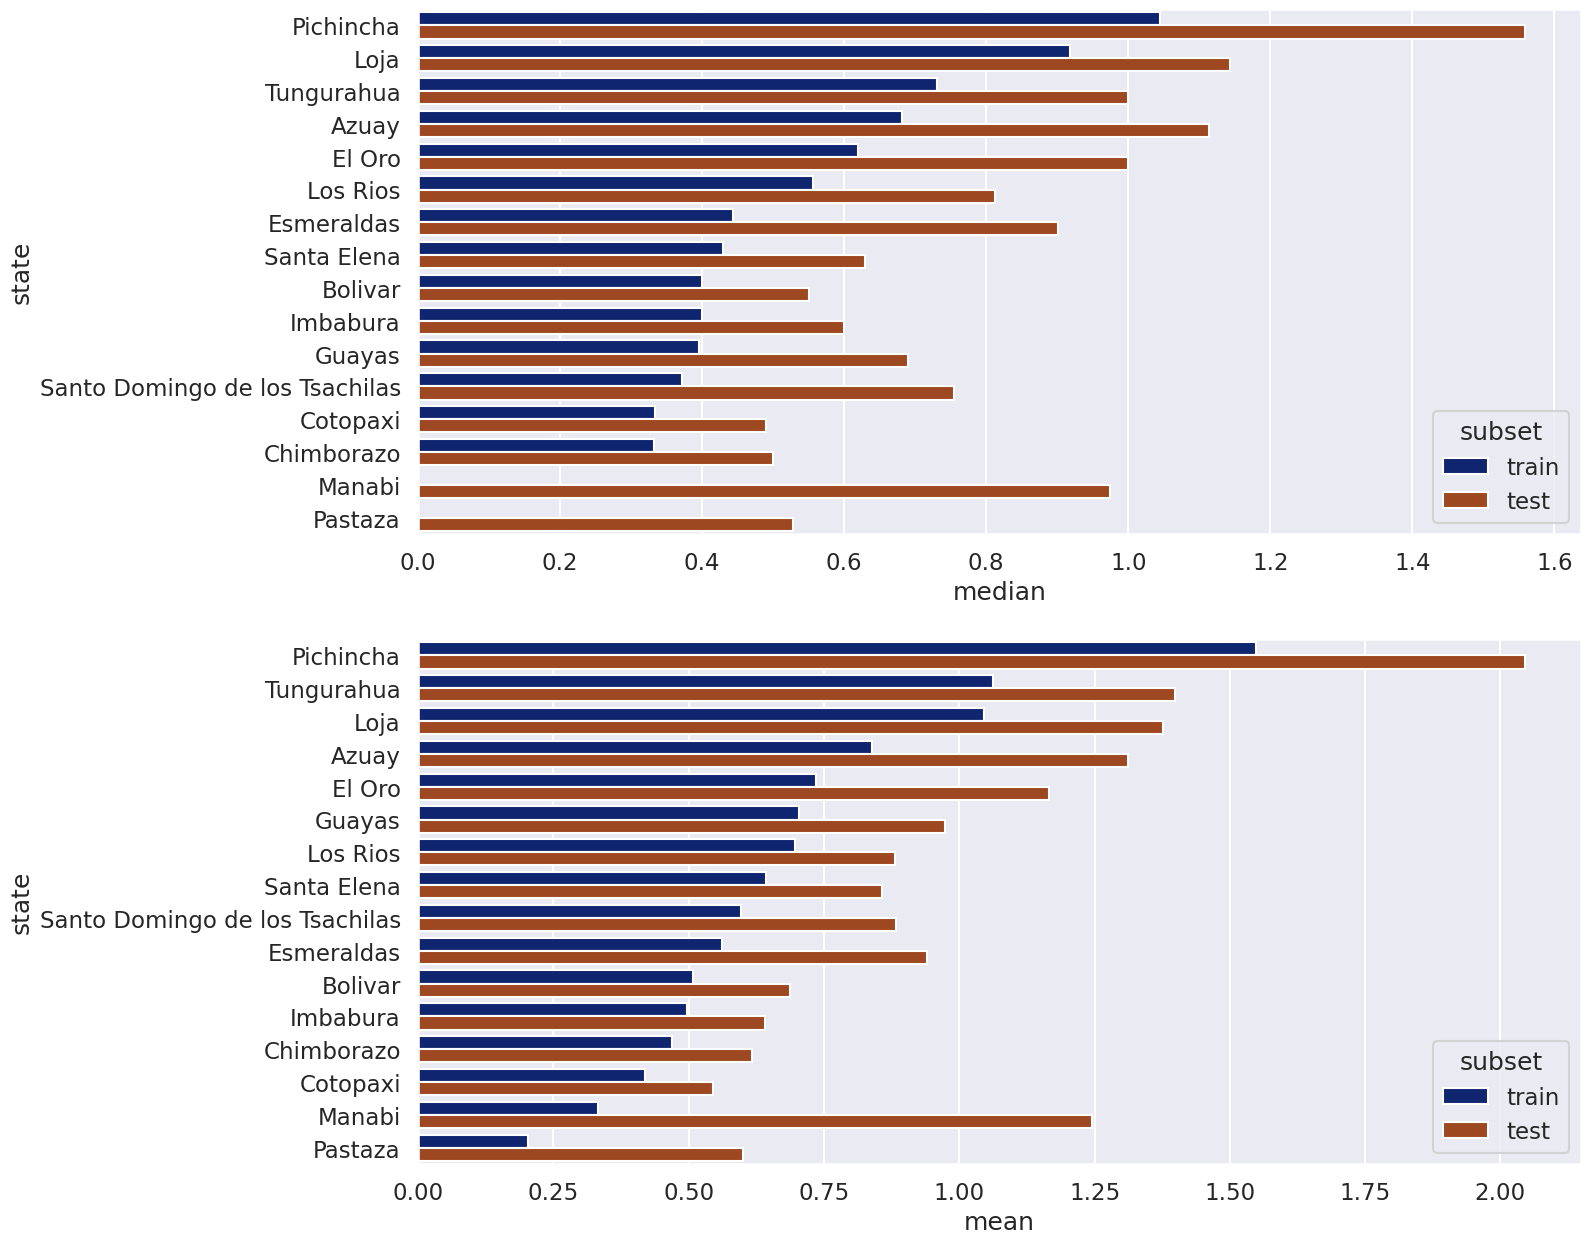

In [62]:
x = 'state'

fig, axs = plt.subplots(2, figsize=(15, 15))

df2 = df.query('not is_submission').groupby([x, 'subset'])['relative_sales'].agg(['median']).reset_index().sort_values(by=['subset', 'median'], ascending=False)
df2[x] = df2[x].astype(str)
sns.barplot(data=df2, y=x, x='median', orient='h', ax=axs[0], hue='subset', hue_order=['train', 'test'])

df2 = df.query('not is_submission').groupby([x, 'subset'])['relative_sales'].agg(['mean']).reset_index().sort_values(by=['subset', 'mean'], ascending=False)
df2[x] = df2[x].astype(str)
sns.barplot(data=df2, y=x, x='mean', orient='h', ax=axs[1], hue='subset', hue_order=['train', 'test'])

plt.show()

Besided the fact, that the distribution is almost the same for both train and test, it is possible  
to distinguish cities and states with high overall sales

## 5. Relative sales vs type

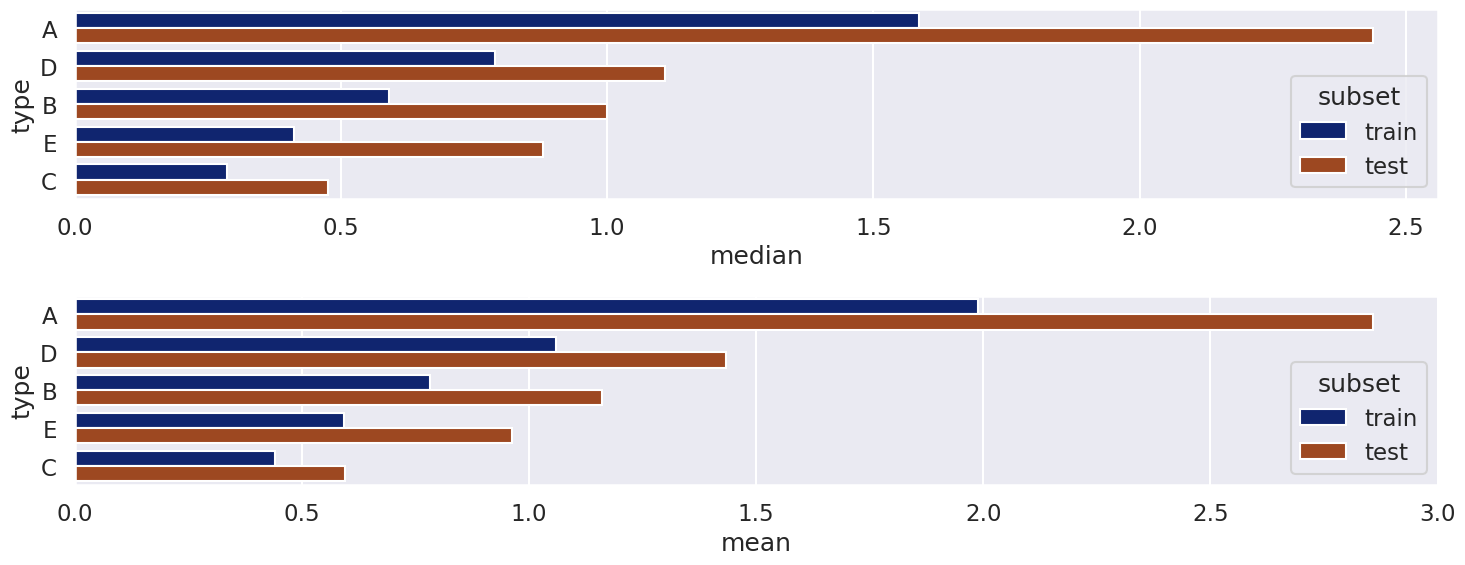

In [66]:
x = 'type'

fig, axs = plt.subplots(2, figsize=(15, 6))

df2 = df.query('not is_submission').groupby([x, 'subset'])['relative_sales'].agg(['median']).reset_index().sort_values(by=['subset', 'median'], ascending=False)
df2[x] = df2[x].astype(str)
sns.barplot(data=df2, y=x, x='median', orient='h', ax=axs[0], hue='subset', hue_order=['train', 'test'])

df2 = df.query('not is_submission').groupby([x, 'subset'])['relative_sales'].agg(['mean']).reset_index().sort_values(by=['subset', 'mean'], ascending=False)
df2[x] = df2[x].astype(str)
sns.barplot(data=df2, y=x, x='mean', orient='h', ax=axs[1], hue='subset', hue_order=['train', 'test'])

fig.tight_layout()
plt.show()

We can see, that:
- shop type A sales a lot more than average value
- shop type B, D sales almost as much as average value
- other shops sale a lot less than average value

# V. Time series analysis

## 1. Relative sales

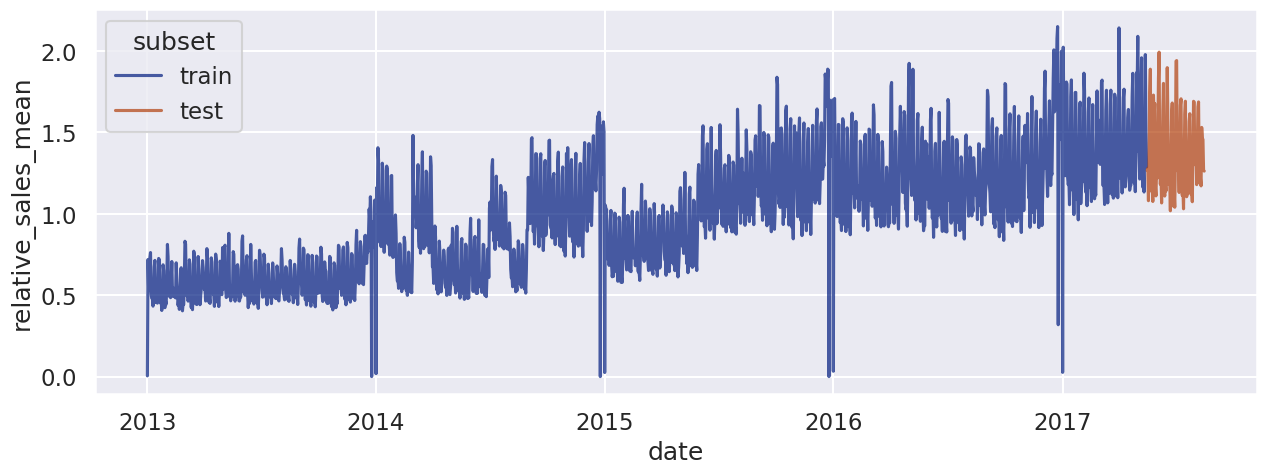

In [68]:
df2 = df.query('not is_submission').groupby(['date', 'subset']).agg({'relative_sales': ['sum', 'mean', 'median']}).reset_index()
df2.columns = ['date', 'subset', 'relative_sales_sum','relative_sales_mean','relative_sales_median']

plt.figure(figsize=(15, 5))
sns.lineplot(data=df2, x='date', y='relative_sales_mean', hue='subset', alpha=0.7)
plt.show()

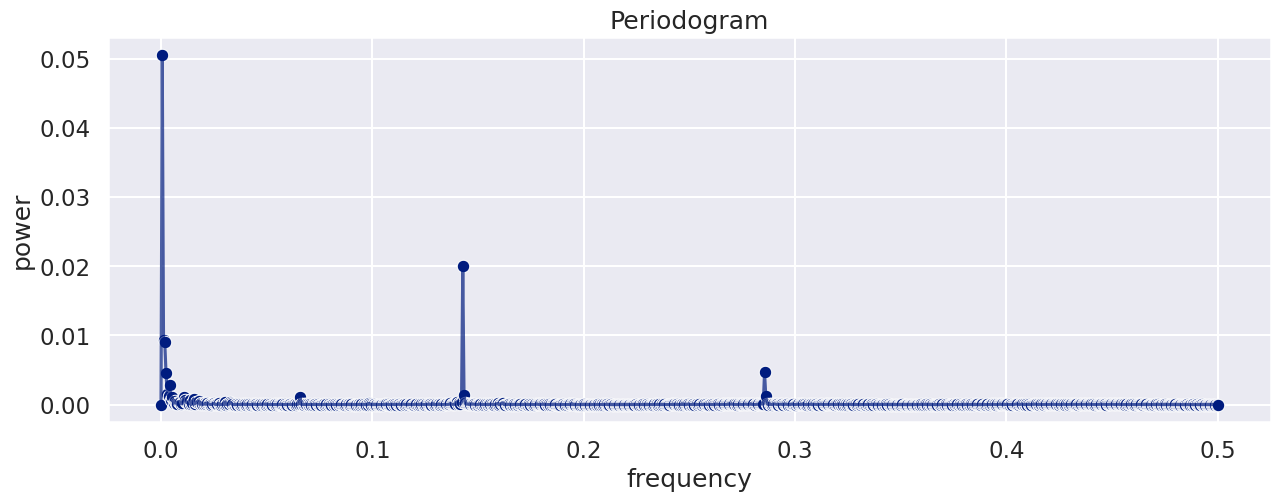

frequency     power       period
1     0.000592  0.050605  1688.000000
241   0.142773  0.020047     7.004149
2     0.001185  0.009290   844.000000
3     0.001777  0.009002   562.666667
482   0.285545  0.004661     3.502075
4     0.002370  0.004584   422.000000
7     0.004147  0.002837   241.142857
5     0.002962  0.001477   337.600000
242   0.143365  0.001374     6.975207
6     0.003555  0.001301   281.333333
483   0.286137  0.001203     3.494824
18    0.010664  0.001085    93.777778
111   0.065758  0.001082    15.207207
9     0.005332  0.001046   187.555556
26    0.015403  0.000816    64.923077
8     0.004739  0.000679   211.000000
23    0.013626  0.000649    73.391304
19    0.011256  0.000594    88.842105
11    0.006517  0.000558   153.454545
30    0.017773  0.000538    56.266667

In [69]:
from scipy.signal import periodogram

frequencies, spectrum = periodogram(df2['relative_sales_mean'], scaling='spectrum')
freqs_df = pd.DataFrame({'frequency': frequencies, 'power': spectrum})
freqs_df['period'] = 1/freqs_df['frequency']
plt.figure(figsize=(15, 5))
sns.lineplot(data=freqs_df, x='frequency', y='power', alpha=0.7)
sns.scatterplot(data=freqs_df, x='frequency', y='power')
plt.title('Periodogram')
plt.show()
freqs_df.sort_values(by='power', ascending=False).head(20)



1. The relative sales tends to increase from year to year except for anomalities in 2014
2. A drastic decline in sales is observed right at the start of the new year, which is not a surprize
3. A strong week and half-week seasonality can be seen according to the periodogram. Therefore lags up to 7 days will be considered.

## 2. Relative sales grouped by type

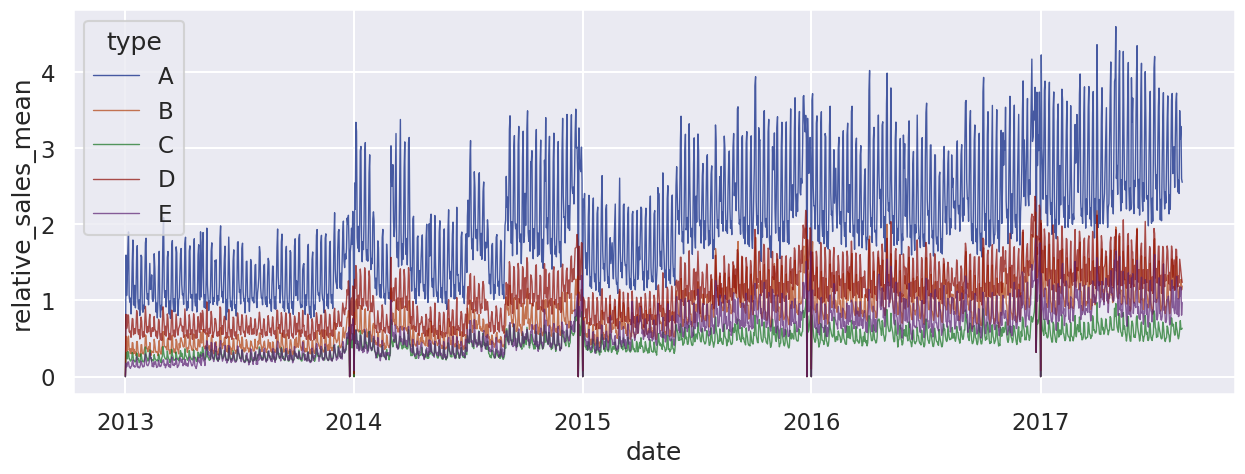

In [87]:
df2 = df.query('not is_submission').groupby(['date', 'type']).agg({'relative_sales': ['sum', 'mean', 'median']}).reset_index()
df2.columns = ['date', 'type', 'relative_sales_sum','relative_sales_mean','relative_sales_median']

plt.figure(figsize=(15, 5))
sns.lineplot(data=df2, x='date', y='relative_sales_mean', hue='type', alpha=0.7, linewidth=1)
plt.show()

## 3. Year

In [8]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday

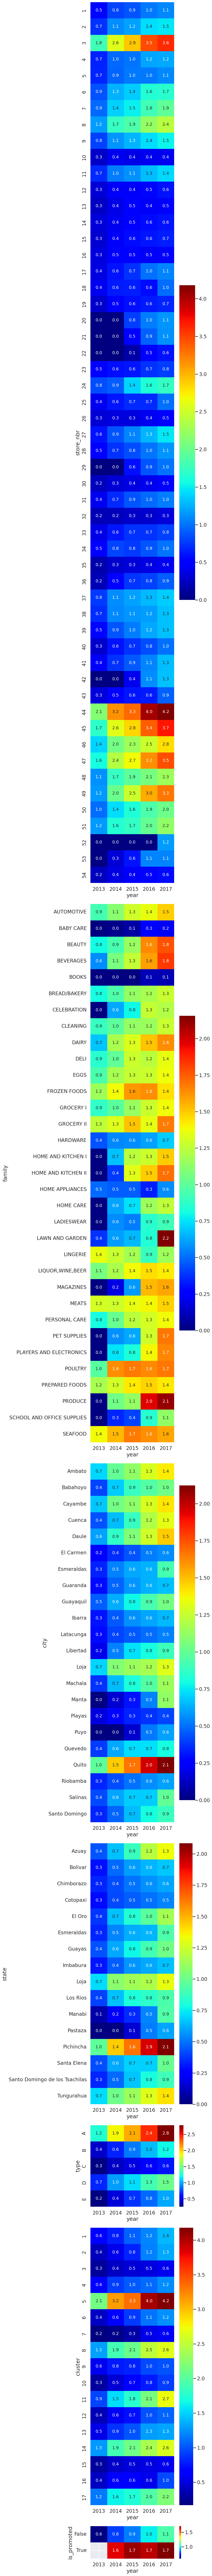

In [50]:
x = 'year'
cols = ['store_nbr', 'family', 'city'] + ['state', 'type', 'cluster', 'is_promoted']
nunique = sum([df[col].nunique() for col in cols])
ratios = [df[col].nunique()/nunique for col in cols]
fig, axs = plt.subplots(len(cols), figsize=(10, 4/5*nunique), gridspec_kw={'height_ratios': ratios})

for it, col in enumerate(cols):
    df2 = df.query('not is_submission').groupby([x, col]).agg({'relative_sales': ['mean']}).reset_index()
    df2.columns = [x, col, 'relative_sales_mean']
    df2 = pd.pivot_table(df2, index=x, columns=col)
    df2.columns = df2.columns.droplevel(0)
    df2 = df2.T
    
    sns.heatmap(df2, annot=True, fmt=".1f", annot_kws={'fontsize': 14}, cmap='jet', ax=axs[it])
    #axs[it].set_yticks(rotation=0)

fig.tight_layout()

## 4. Month

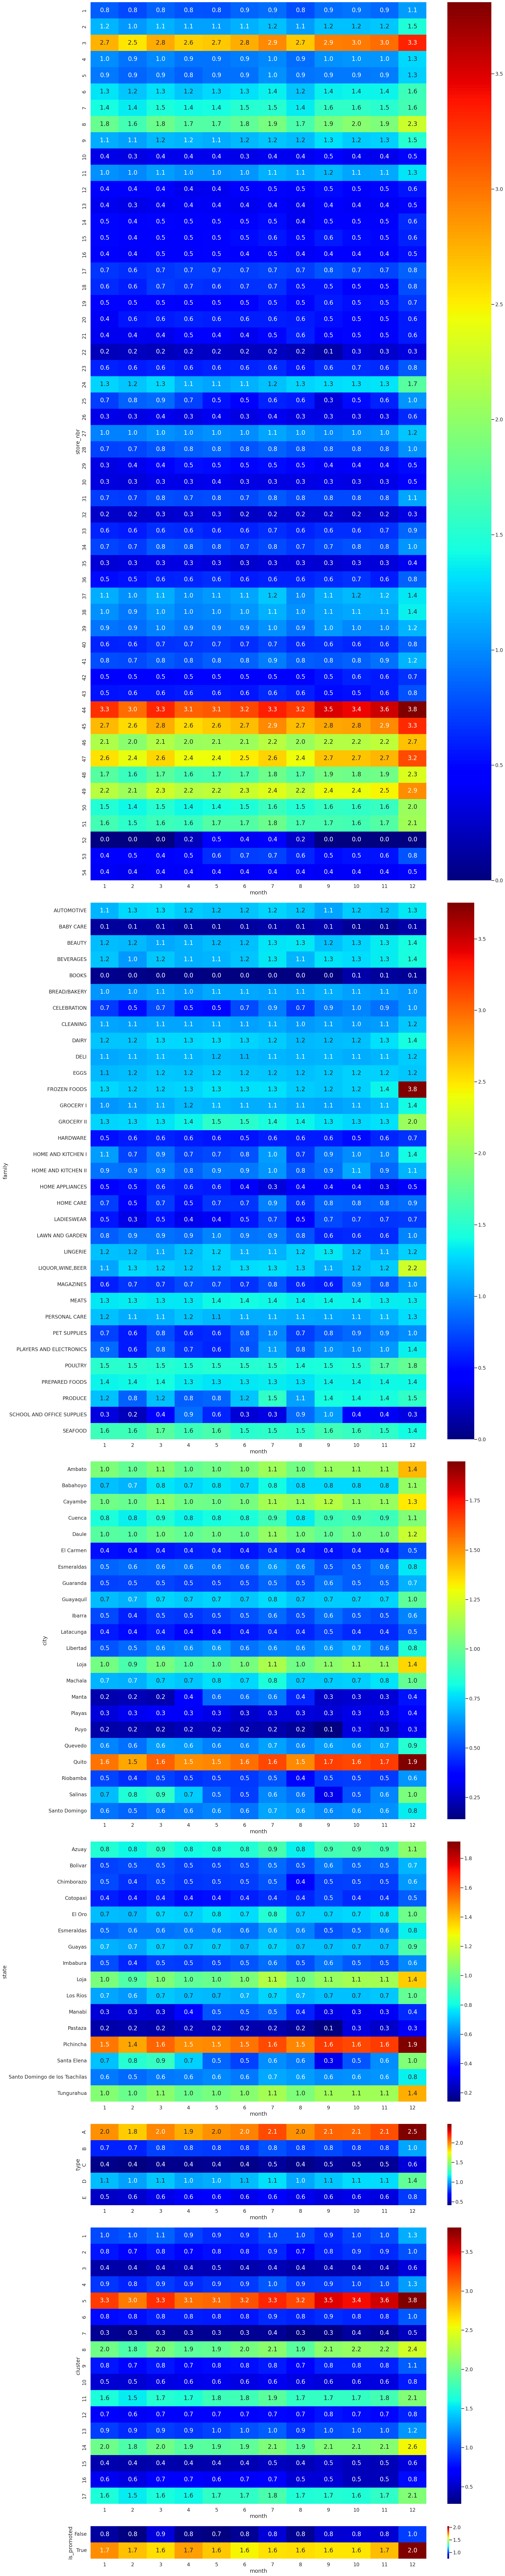

In [52]:
x = 'month'
cols = ['store_nbr', 'family', 'city'] + ['state', 'type', 'cluster', 'is_promoted']
nunique = sum([df[col].nunique() for col in cols])
ratios = [df[col].nunique()/nunique for col in cols]
fig, axs = plt.subplots(len(cols), figsize=(10/df['year'].nunique()*df[x].nunique(), 4/5*nunique), gridspec_kw={'height_ratios': ratios})

for it, col in enumerate(cols):
    df2 = df.query('not is_submission').groupby([x, col]).agg({'relative_sales': ['mean']}).reset_index()
    df2.columns = [x, col, 'relative_sales_mean']
    df2 = pd.pivot_table(df2, index=x, columns=col)
    df2.columns = df2.columns.droplevel(0)
    df2 = df2.T
    
    sns.heatmap(df2, annot=True, fmt=".1f", annot_kws={'fontsize': 20}, cmap='jet', ax=axs[it])
    #axs[it].set_yticks(rotation=0)

fig.tight_layout()

## 5. Weekday

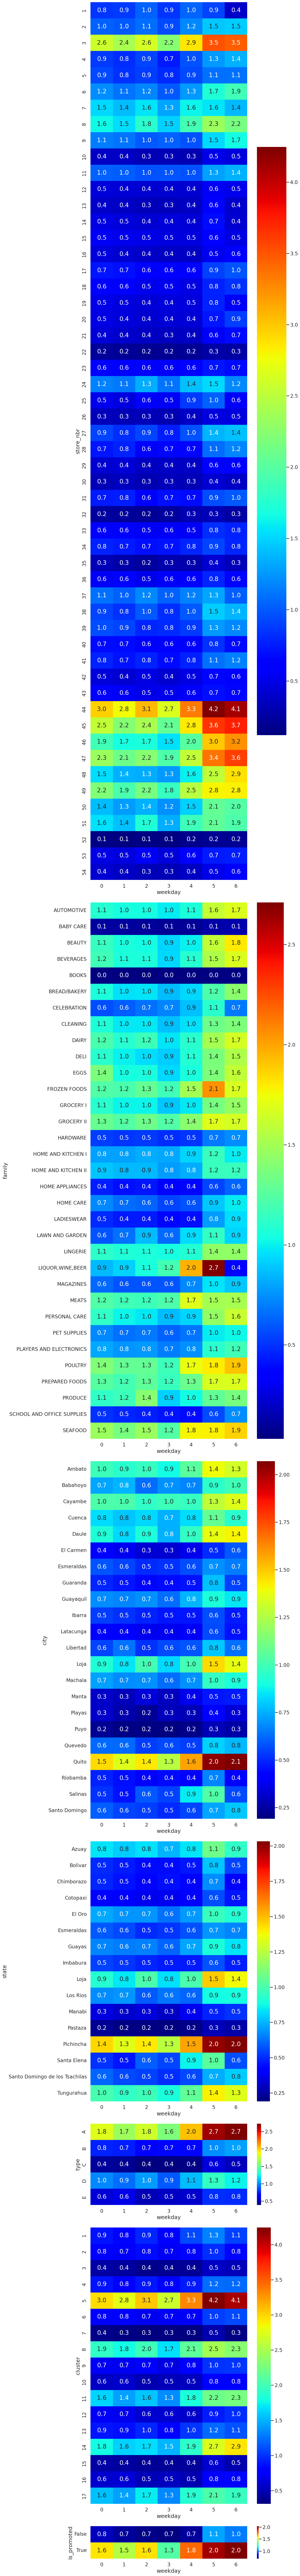

In [53]:
x = 'weekday'
cols = ['store_nbr', 'family', 'city'] + ['state', 'type', 'cluster', 'is_promoted']
nunique = sum([df[col].nunique() for col in cols])
ratios = [df[col].nunique()/nunique for col in cols]
fig, axs = plt.subplots(len(cols), figsize=(10/df['year'].nunique()*df[x].nunique(), 4/5*nunique), gridspec_kw={'height_ratios': ratios})

for it, col in enumerate(cols):
    df2 = df.query('not is_submission').groupby([x, col]).agg({'relative_sales': ['mean']}).reset_index()
    df2.columns = [x, col, 'relative_sales_mean']
    df2 = pd.pivot_table(df2, index=x, columns=col)
    df2.columns = df2.columns.droplevel(0)
    df2 = df2.T
    
    sns.heatmap(df2, annot=True, fmt=".1f", annot_kws={'fontsize': 20}, cmap='jet', ax=axs[it])
    #axs[it].set_yticks(rotation=0)

fig.tight_layout()

# VI. Correlation analysis

In [59]:
from phik import phik_matrix
from phik.report import plot_correlation_matrix

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036528 entries, 0 to 3036527
Data columns (total 21 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   id                        int64         
 1   date                      datetime64[ns]
 2   store_nbr                 int64         
 3   family                    object        
 4   onpromotion               float64       
 5   is_submission             bool          
 6   city                      object        
 7   state                     object        
 8   type                      object        
 9   cluster                   int64         
 10  dcoilwtico                float64       
 11  transactions              float64       
 12  median_sales_over_family  float64       
 13  relative_sales            float64       
 14  subset                    object        
 15  scaled_dcoilwtico         float64       
 16  is_promoted               bool          
 17  year    

In [9]:
df['store_nbr'] = df['store_nbr'].astype('str')
df['cluster'] = df['cluster'].astype('str')
df['year'] = df['year'].astype('str')
df['month'] = df['month'].astype('str')
df['weekday'] = df['weekday'].astype('str')

interval columns not set, guessing: ['onpromotion', 'dcoilwtico', 'transactions', 'scaled_dcoilwtico', 'relative_sales']


Text(0.5, 1.0, 'Phik Correlation Matrix')

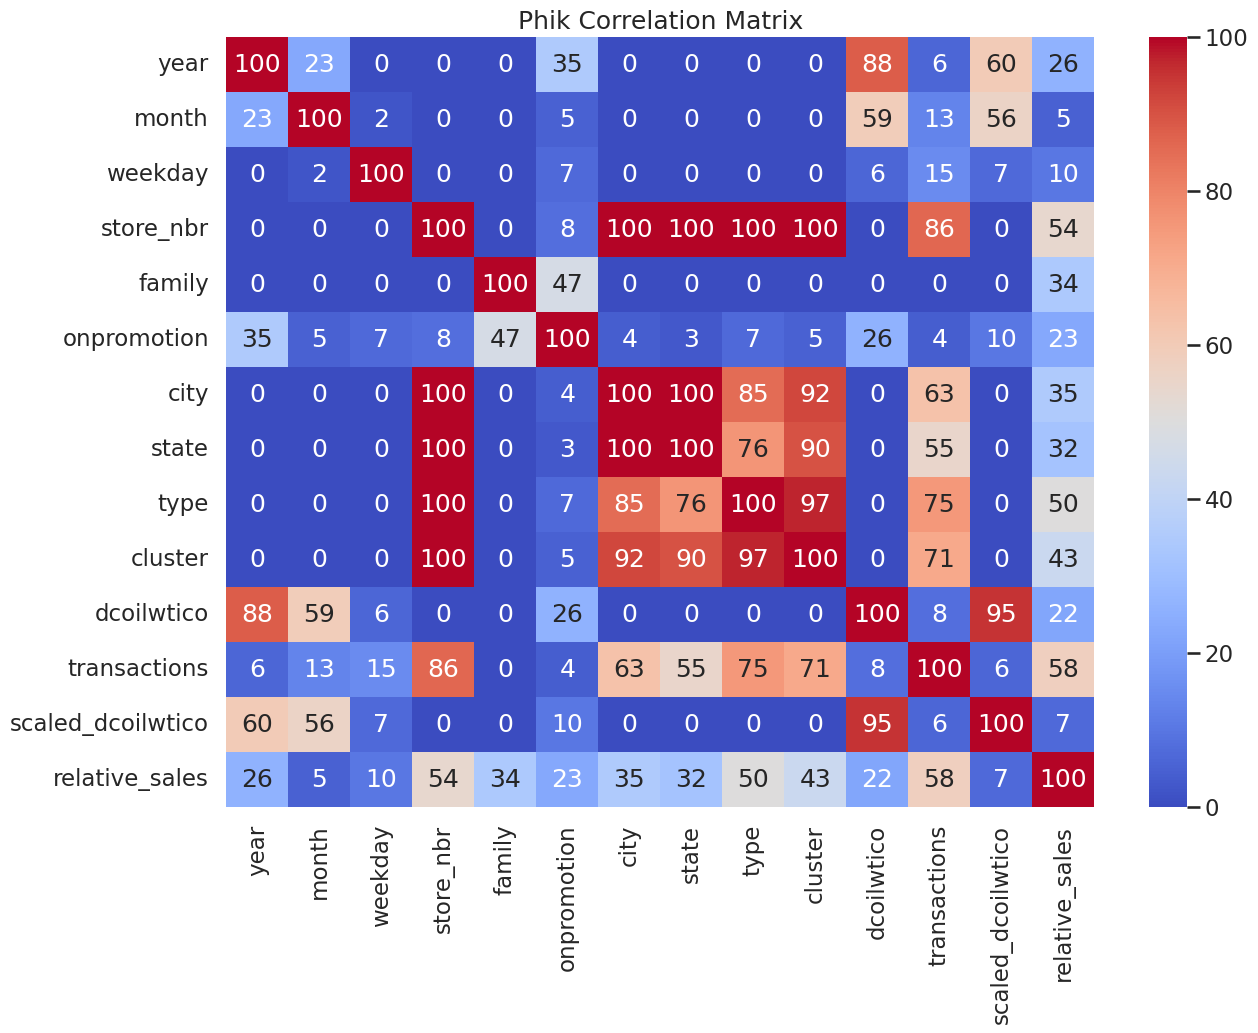

In [76]:
features = [
    'year', 
    'month',
    'weekday',
    "store_nbr",
    "family",
    "onpromotion",
    "city",
    "state",
    "type",
    "cluster",
    "dcoilwtico",
    "transactions",
    "scaled_dcoilwtico",
    "relative_sales",
]
phik_matrix = df[features].phik_matrix()

plt.figure(figsize=(14, 10))
sns.heatmap((phik_matrix*100).astype(int), annot=True, cmap='coolwarm', fmt='d')
plt.title("Phik Correlation Matrix")

In [10]:
df.to_csv('../data/artifacts/data_after_eda.csv', index=False)